In [3]:
import cufflinks as cf 
from IPython.display import display, HTML
import pandas as pd

In [4]:
cf.set_config_file(sharing='public', theme='ggplot', offline=True)

In [5]:
df_population_raw = pd.read_csv('population_total.csv')
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


**Pivote Table**    The pivot() method returns a reformed data frame that is organized by certain column index/values.                                                  

In [6]:
#delete null values
df_population_raw.dropna(inplace=True)

In [7]:
#make pivot table
df_pivot = df_population_raw.pivot_table(
    index='year',
    columns='country',
    values='population'
)

In [8]:
#resize table with a WHERE clause
df_pivot = df_pivot[['United States', 'China', 'Brazil', 'Argentina', 'Japan']]

In [9]:
df_pivot

country,United States,China,Brazil,Argentina,Japan
year,,,,,
1955.0,171685336.0,6.122416e+08,62533919.0,18789418.0,89018257.0
1960.0,186720571.0,6.604081e+08,72179226.0,20481779.0,93673615.0
1965.0,199733676.0,7.242190e+08,83373530.0,22159650.0,98447002.0
1970.0,209513341.0,8.276014e+08,95113265.0,23880561.0,104929251.0
1975.0,219081251.0,9.262409e+08,107216205.0,25865776.0,112413359.0
1980.0,229476354.0,1.000089e+09,120694009.0,27896528.0,117816940.0
1985.0,240499825.0,1.075589e+09,135274080.0,30216279.0,121883482.0
1990.0,252120309.0,1.176884e+09,149003223.0,32618651.0,124505240.0
1995.0,265163745.0,1.240921e+09,162019896.0,34828170.0,126365484.0


**Visualization**

<Axes: title={'center': 'Población 1995-2020'}, xlabel='Año', ylabel='Población'>

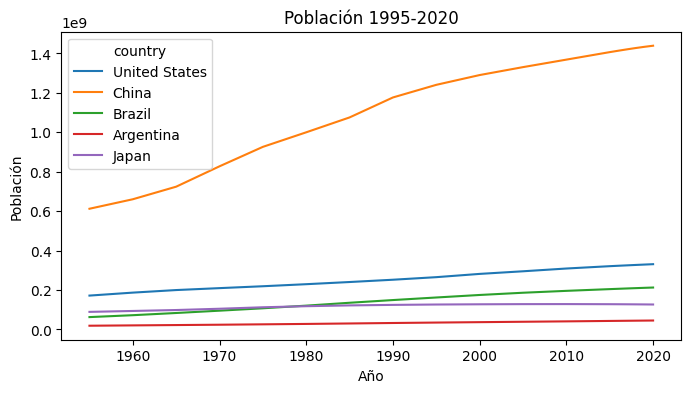

In [10]:
#Lineplot(Gráfico de línea)
df_pivot.plot(
    kind='line', 
    xlabel='Año', 
    ylabel='Población',
    title='Población 1995-2020',
    figsize=(8, 4)
    )

In [11]:
#BarPlots with only year 2020
df_2020 = df_pivot[df_pivot.index.isin([2020])]
df_pivot[df_pivot.index.isin([2020])]

country,United States,China,Brazil,Argentina,Japan
year,,,,,
2020.0,331002651.0,1.439324e+09,212559417.0,45195774.0,126476461.0


In [12]:
#transpose a data frame (changing rows and columns)
df_2020 = df_2020.T

<Axes: title={'center': 'Población 2020'}, xlabel='Años', ylabel='Población'>

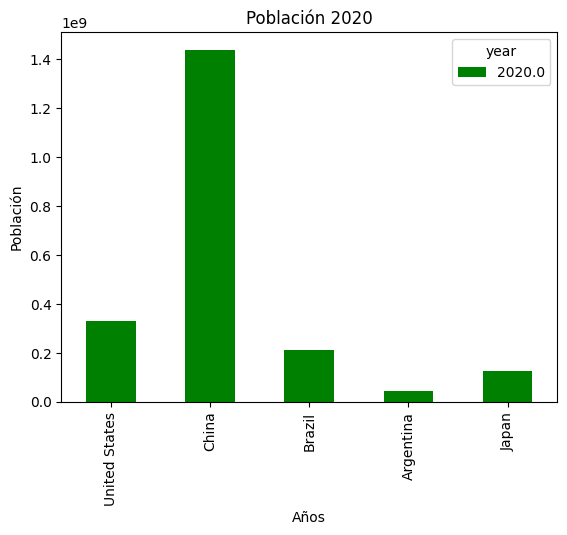

In [13]:
#Make Barplot
df_2020.plot(
    kind='bar', 
    color='green',
    xlabel='Años',
    ylabel='Población',
    title='Población 2020'
    )

**Barplot Agrupado**

In [14]:
df_years = df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]

<Axes: xlabel='year'>

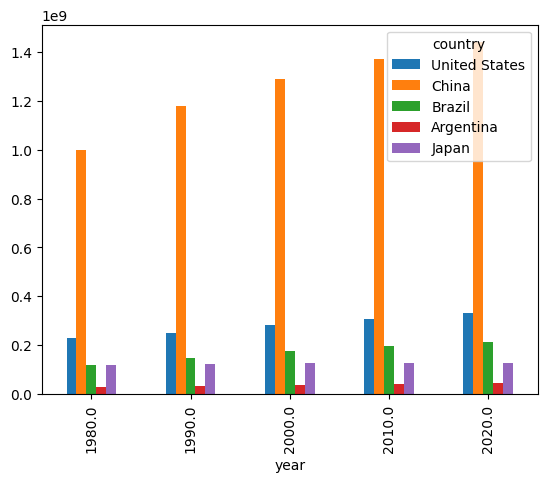

In [15]:
#group barplots
df_years.plot(kind='bar')

**Pie Chart**

In [37]:
#define variable pivot
df_pie = df_population_raw.pivot_table(
    index='year',
    columns='country',
    values='population'
) 
df_pie_2020 = df_pie[df_pie.index.isin([2020])]
df_pie_2020[df_pie_2020.index.isin([2020])]

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2020.0,38928346.0,2877797.0,43851044.0,NaN,NaN,32866272.0,NaN,97929.0,45195774.0,2963243.0,...,3473730.0,33469203.0,307145.0,28435940.0,97338579.0,NaN,597339.0,29825964.0,18383955.0,14862924.0


In [42]:
#change name of the column (type)
df_pie_2020.rename(columns={2020:'2020'}, inplace=True)

In [43]:
# pie graph
df_pie_2020 = df_pie_2020.T  # Transpose so countries are the index
df_pie_2020.plot(kind='pie', y='2020', legend=False, title='Population Distribution 2020')

KeyError: '2020'

***BoxPlot***

In [45]:
df_pivot

country,United States,China,Brazil,Argentina,Japan
year,,,,,
1955.0,171685336.0,6.122416e+08,62533919.0,18789418.0,89018257.0
1960.0,186720571.0,6.604081e+08,72179226.0,20481779.0,93673615.0
1965.0,199733676.0,7.242190e+08,83373530.0,22159650.0,98447002.0
1970.0,209513341.0,8.276014e+08,95113265.0,23880561.0,104929251.0
1975.0,219081251.0,9.262409e+08,107216205.0,25865776.0,112413359.0
1980.0,229476354.0,1.000089e+09,120694009.0,27896528.0,117816940.0
1985.0,240499825.0,1.075589e+09,135274080.0,30216279.0,121883482.0
1990.0,252120309.0,1.176884e+09,149003223.0,32618651.0,124505240.0
1995.0,265163745.0,1.240921e+09,162019896.0,34828170.0,126365484.0


<Axes: title={'center': 'Box Plot of United States Population'}, ylabel='Population'>

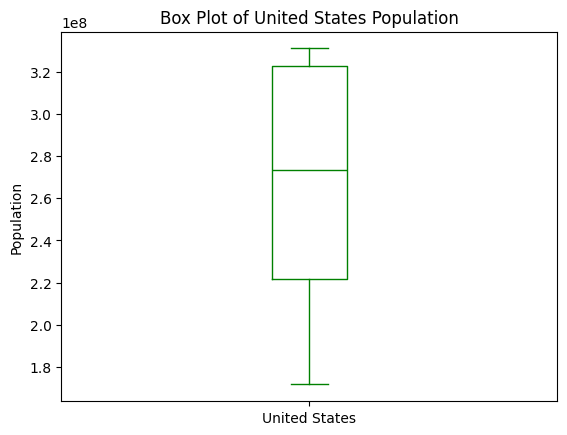

In [50]:
#Only BoxPlot
df_pivot['United States'].plot(kind='box', title='Box Plot of United States Population', color='green', ylabel='Population')

<Axes: title={'center': 'Box Plot of Population by Country'}, ylabel='Population'>

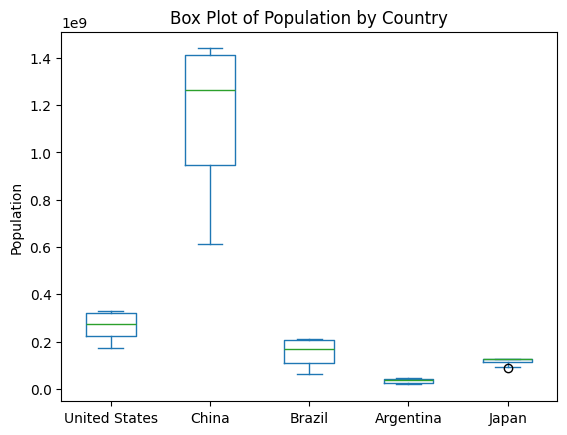

In [51]:
#Multiple BoxPlot
df_pivot.plot(kind='box', title='Box Plot of Population by Country', ylabel='Population', )

***Histogram***

<Axes: title={'center': 'Histogram of China Population'}, xlabel='Population', ylabel='Frequency'>

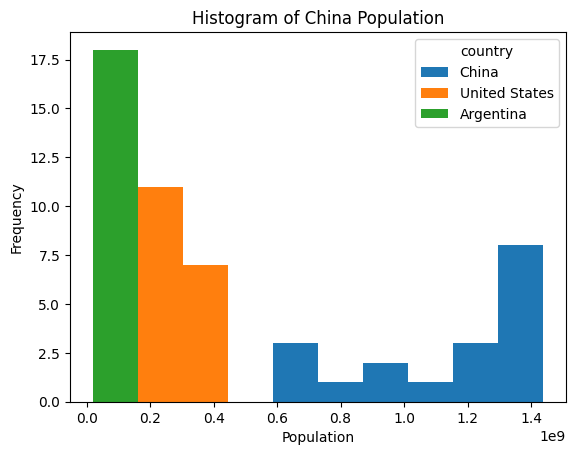

In [55]:
df_pivot[['China', 'United States', 'Argentina']].plot(kind='hist', bins=10, title='Histogram of China Population', xlabel='Population', ylabel='Frequency')

***ScatterPlot***

In [ ]:
#select elements of the list
df_sample = df_population_raw[df_population_raw['country'].isin(['China', 'United States', 'Argentina'])]

<Axes: title={'center': 'Population over Years'}, xlabel='year', ylabel='population'>

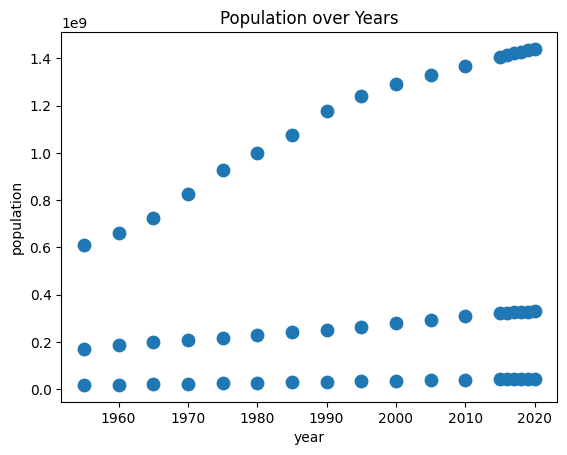

In [64]:
#Plot
df_sample.plot(
    kind='scatter',
    x='year',
    y='population',
    title='Population over Years',
    s=80,  # size of points

    )